LOAD DATA - READ customer_churn.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dkteds/ANN/main/customer_churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DROP CUSTOMERID COLUMN AS IT IS OF NO USE

In [ ]:
df = df.drop(columns=['customerID'])

## Create New Dataset by Remove rows with space in TotalCharges

In [ ]:
df['TotalCharges'].str.isspace().sum()

11

In [ ]:
x = df[df['TotalCharges'].str.isspace()].index
df1 = df.drop(x)

In [ ]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Change TotalCharges Datatype to Numeric using to_numeric function

In [ ]:
df1['TotalCharges'].dtype

dtype('O')

In [ ]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [ ]:
df1['TotalCharges'].dtype

dtype('float64')

##Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


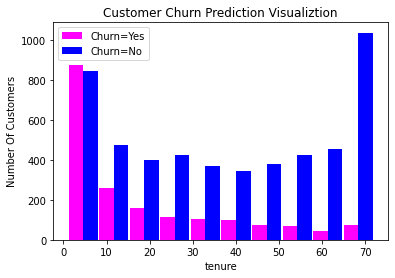

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

import matplotlib.pyplot as plt
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['magenta','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

Check With Monthly Charges

In [ ]:
df1['MonthlyCharges'].isnull().sum()

0

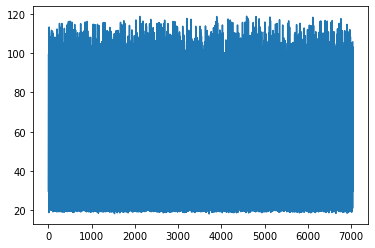

In [ ]:
plt.plot('MonthlyCharges', data=df1)
plt.show()

Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [ ]:
def print_unique_col_values(df1):
       for column in df1:
            if df1[column].dtypes=='object':
                print(f'{column}: {df1[column].unique()}') 
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [ ]:
df1 = df1.replace(to_replace='No phone service', value='No')
df1 = df1.replace(to_replace='No internet service', value='No')

Convert Yes and No to 1 or 0

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
df1 = df1.replace(to_replace=['Yes', 'No'], value=[1, 0])

In [ ]:
# def print_unique_col_values(df1):
#        for column in df1:
#           print(f'{column}: {df1[column].unique()}') 
# print_unique_col_values(df1)

CHECK VALUES

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


CHANGE GENDER VALUES TO 0,1 for FEMALE & MALE

In [ ]:
df1['gender'] = df1['gender'].map({'Female':0, 'Male':1})

One hot encoding for categorical columns

In [ ]:
df2 = pd.get_dummies(data=df1, columns=yes_no_columns)
df2.head()

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,DeviceProtection_0,DeviceProtection_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,PaperlessBilling_0,PaperlessBilling_1,Churn_0,Churn_1
0,0,0,0.000003,DSL,Month-to-month,Electronic check,-0.183387,0.001275,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0
1,1,0,0.000091,DSL,One year,Mailed check,-0.183361,0.215867,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0
2,1,0,0.000005,DSL,Month-to-month,Mailed check,-0.183364,0.010310,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1
3,1,0,0.000121,DSL,One year,Bank transfer (automatic),-0.183375,0.210241,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
4,0,0,0.000005,Fiber optic,Month-to-month,Electronic check,-0.183347,0.015330,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1


Apply MinMaxScalar to 'tenure','MonthlyCharges','TotalCharges'

In [ ]:
df2.TotalCharges.dtype

dtype('float64')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

scaler.fit(df2[['tenure']])
df2['tenure'] = scaler.transform(df2[['tenure']])

scaler.fit(df2[['MonthlyCharges']])
df2['MonthlyCharges'] = scaler.transform(df2[['MonthlyCharges']])

scaler.fit(df2[['TotalCharges']])
df2['TotalCharges'] = scaler.transform(df2[['TotalCharges']])

Train test split

In [ ]:
# X = df2.drop('Churn')
# y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Build a model (ANN) in tensorflow/keras

EVALUATE & PREDICT

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = 

In [ ]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')